In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos de Alemania:

## 1) Datos

### 1.1)Carga

In [2]:
# Oscar
#file_path = r'C:\Users\oscar\OneDrive - Universidad Nacional de Colombia\Universidad-Fisica\Introduccion a la investigacion teorica\Dinamica viral\Aktuell_Deutschland_SarsCov2_Infektionen.txt'

#Sebastian
file_path = r"../../Descargas/Aktuell_Deutschland_SarsCov2_Infektionen.csv"



# Read the data from the text file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's been read correctly
data.head()

,IdLandkreis,Altersgruppe,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
0,1001,A15-A34,M,2020-10-28,2020-01-19,1,0,-9,0,1,0,1
1,1001,A15-A34,M,2020-03-19,2020-03-13,1,0,-9,0,1,0,1
2,1001,A15-A34,M,2020-03-21,2020-03-13,1,0,-9,0,1,0,1
3,1001,A15-A34,M,2020-03-19,2020-03-16,1,0,-9,0,1,0,1
4,1001,A15-A34,M,2020-03-14,2020-03-16,1,0,-9,0,1,0,1


### 1.2) Rename

In [3]:
#Data for the period from March 1 to July 1, 2021. Se muestra un único grupo de casos por fila
column_names=['Distrito de identificación', 'Grupo de edad', 'Género', 'Fecha de informe', 'Fecha de referencia','Es el comienzo de la enfermedad?', 'Nuevo caso', 'Muerte nueva', 'Recuperación nueva', 'Número de casos', 'Número de muertes', 'Número de recuperaciones']
data = data.rename(columns=dict(zip(data.columns, column_names)))
data.head()


,Distrito de identificación,Grupo de edad,Género,Fecha de informe,Fecha de referencia,Es el comienzo de la enfermedad?,Nuevo caso,Muerte nueva,Recuperación nueva,Número de casos,Número de muertes,Número de recuperaciones
0,1001,A15-A34,M,2020-10-28,2020-01-19,1,0,-9,0,1,0,1
1,1001,A15-A34,M,2020-03-19,2020-03-13,1,0,-9,0,1,0,1
2,1001,A15-A34,M,2020-03-21,2020-03-13,1,0,-9,0,1,0,1
3,1001,A15-A34,M,2020-03-19,2020-03-16,1,0,-9,0,1,0,1
4,1001,A15-A34,M,2020-03-14,2020-03-16,1,0,-9,0,1,0,1


In [4]:
data['Fecha de referencia'] = pd.to_datetime(data['Fecha de referencia'])
data = data.sort_values('Fecha de referencia')

In [5]:
data.head(22)

,Distrito de identificación,Grupo de edad,Género,Fecha de informe,Fecha de referencia,Es el comienzo de la enfermedad?,Nuevo caso,Muerte nueva,Recuperación nueva,Número de casos,Número de muertes,Número de recuperaciones
6858817,14628,A15-A34,W,2022-01-04,2020-01-01,1,0,-9,0,1,0,1
6299812,12064,A35-A59,M,2021-01-06,2020-01-01,1,0,-9,0,1,0,1
5900976,11003,A15-A34,M,2021-01-13,2020-01-01,1,0,-9,0,1,0,1
5486293,9761,A35-A59,M,2021-01-07,2020-01-01,1,0,-9,0,1,0,1
6810773,14626,A35-A59,W,2021-01-05,2020-01-01,1,0,-9,0,1,0,1
122149,1056,A35-A59,W,2021-01-04,2020-01-01,1,0,-9,0,1,0,1
2977992,7134,A60-A79,W,2021-01-03,2020-01-01,1,0,-9,0,1,0,1
25251,1002,A35-A59,W,2021-01-07,2020-01-01,1,0,-9,0,1,0,1
5048238,9475,A15-A34,W,2020-12-09,2020-01-01,1,0,-9,0,1,0,1
165742,1059,A35-A59,W,2021-01-04,2020-01-01,1,0,-9,0,2,0,2


Numero de casos: Entiendo que es el numero de infectados por case group(cada fila es un case group), falta comprobar

Fecha de ref: fecha de inicio de la enfermedad

Numerod e recuperaciones: Recuperados por cada case group

Numero de muertes:Muertos por cada case group


### 1.3)Grafica de toda la informacion y solo para marzo-julio 2021

In [6]:
population = 83800000

# convertiendo a date
data['Fecha de referencia'] = pd.to_datetime(data['Fecha de referencia'])
data = data.sort_values('Fecha de referencia')

# Get the unique days
unique_days = data['Fecha de referencia'].dt.date.unique().tolist()
print(unique_days)

#numero de casos por dia ESTE ESTA BIEN
cases_by_date = data.groupby('Fecha de referencia')['Número de casos'].sum().tolist()
print(len(cases_by_date))

#Numero de casos por dia acumulados 
cumulative_sum = [sum(cases_by_date[:i]) for i in range(1, len(cases_by_date)+1)]
print(len(cumulative_sum))



#Numero de recuperaciones por dia
recovering_by_date = data.groupby('Fecha de referencia')['Número de recuperaciones'].sum().tolist()
print(len(recovering_by_date))

#Numero de muertos por dia
deaths_by_date = data.groupby('Fecha de referencia')['Número de muertes'].sum().tolist()
print(len(deaths_by_date))

#Numero de removidos por dia
removing_by_date = np.array(deaths_by_date) + np.array(recovering_by_date)
print(len(removing_by_date))

#Numero de removidos acumulados por dia
cumulative_removing_by_date = [sum(removing_by_date[:i]) for i in range(1, len(removing_by_date)+1)]
print(len(cumulative_removing_by_date))



#numero de suceptibles por dia
susceptible_by_date = population - np.array(cumulative_sum) #- np.array(cumulative_removing_by_date)
print(len(susceptible_by_date))

[datetime.date(2020, 1, 1), datetime.date(2020, 1, 2), datetime.date(2020, 1, 3), datetime.date(2020, 1, 4), datetime.date(2020, 1, 5), datetime.date(2020, 1, 6), datetime.date(2020, 1, 7), datetime.date(2020, 1, 8), datetime.date(2020, 1, 9), datetime.date(2020, 1, 10), datetime.date(2020, 1, 11), datetime.date(2020, 1, 12), datetime.date(2020, 1, 13), datetime.date(2020, 1, 14), datetime.date(2020, 1, 15), datetime.date(2020, 1, 16), datetime.date(2020, 1, 17), datetime.date(2020, 1, 18), datetime.date(2020, 1, 19), datetime.date(2020, 1, 20), datetime.date(2020, 1, 21), datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datet

In [7]:
#WE need to find the index of the dates of March 1 and July 1
march_1_index = unique_days.index(pd.to_datetime('2021-03-01').date())
july_1_index = unique_days.index(pd.to_datetime('2021-07-01').date())
print(march_1_index, july_1_index)

425 547


# **1)Graficas por dia :**

## 1.1)Numero de casos

Estoy graficando el numero de casos o Anzahfall por dia, agrupe por fecha y sume los valores de 'Número de casos', creo que eso me da el numero de infectados por dia. Sin embargo, ne me dio la misma grafica que el articulo, el orden de los infectados es mucho mayor en esa.

Text(0, 0.5, 'Número de casos')

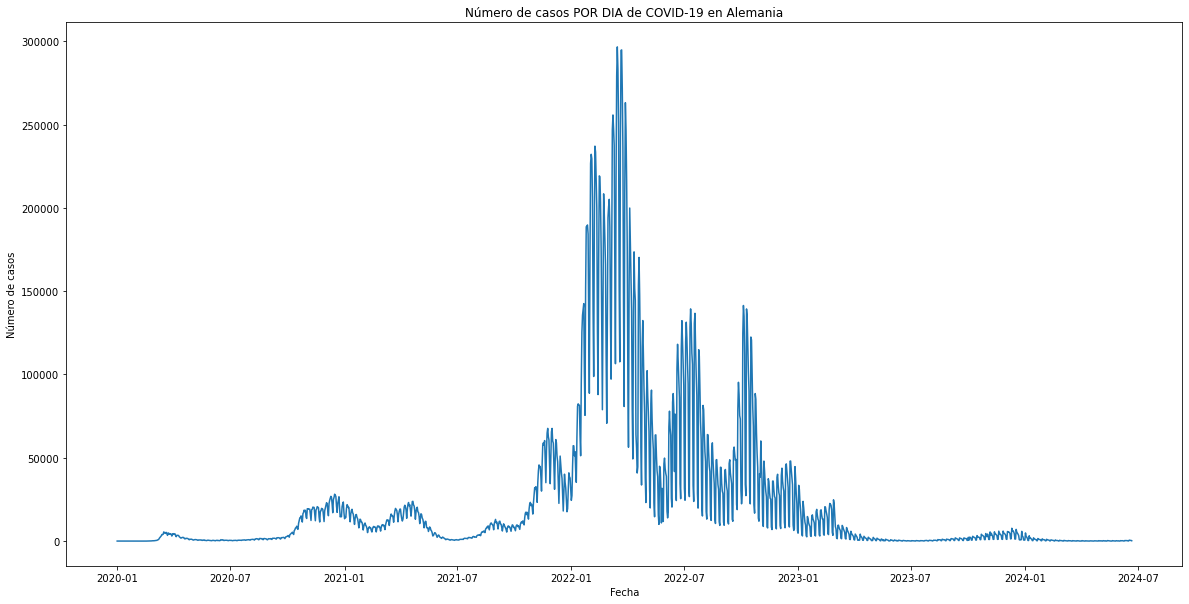

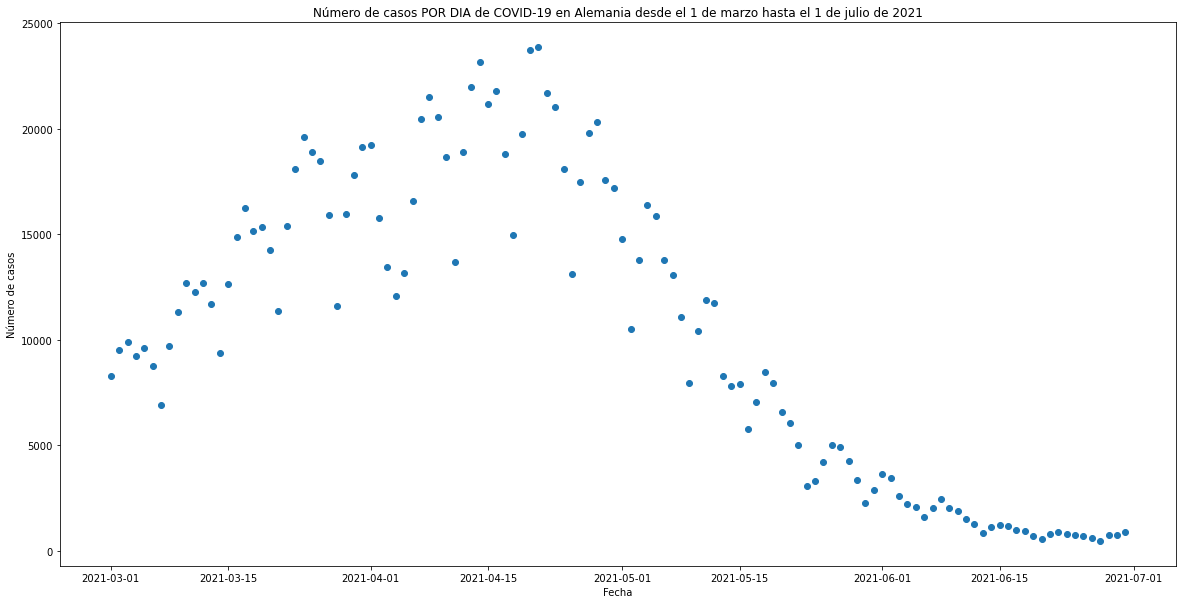

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(unique_days, cases_by_date)
plt.title('Número de casos POR DIA de COVID-19 en Alemania')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

plt.figure(figsize=(20, 10))
plt.scatter(unique_days[425:547], cases_by_date[425:547])
plt.title('Número de casos POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

A modo de verificacion se supone que el numeor de infectados va a llegar a un punto donde no aumente mas, para eso usamos el cumulative_sum

Text(0, 0.5, 'Número de casos')

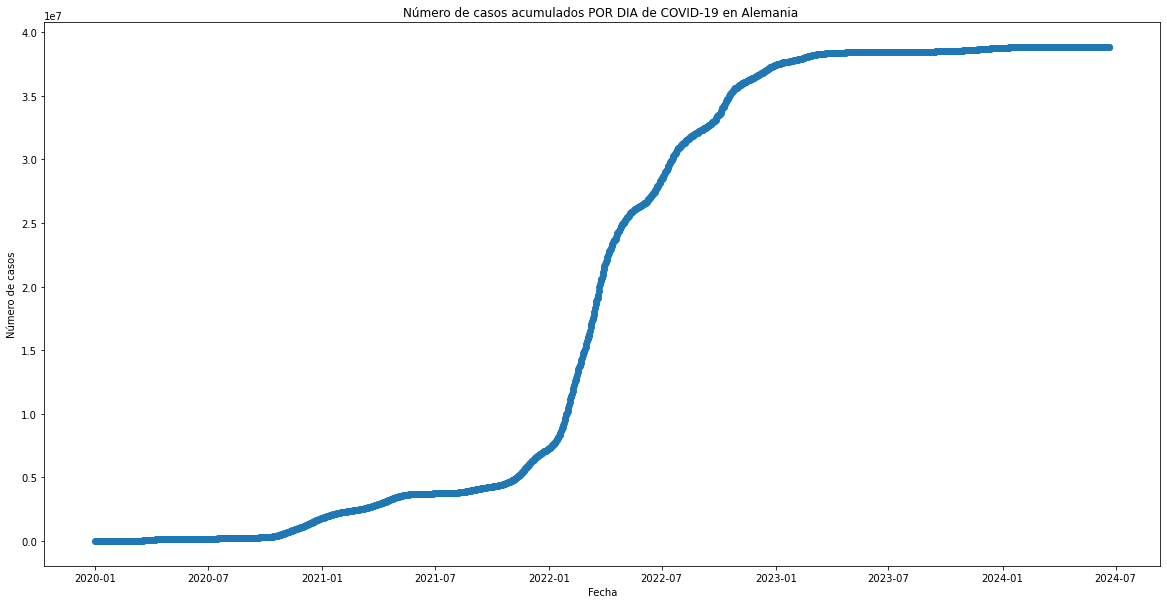

In [9]:
plt.figure(figsize=(20, 10))
plt.scatter(unique_days, cumulative_sum)
plt.title('Número de casos acumulados POR DIA de COVID-19 en Alemania ')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

## 1.2)Los removidos R: acumulalo, esta bien
R=R_rec+Death

Text(0, 0.5, 'Número de casos')

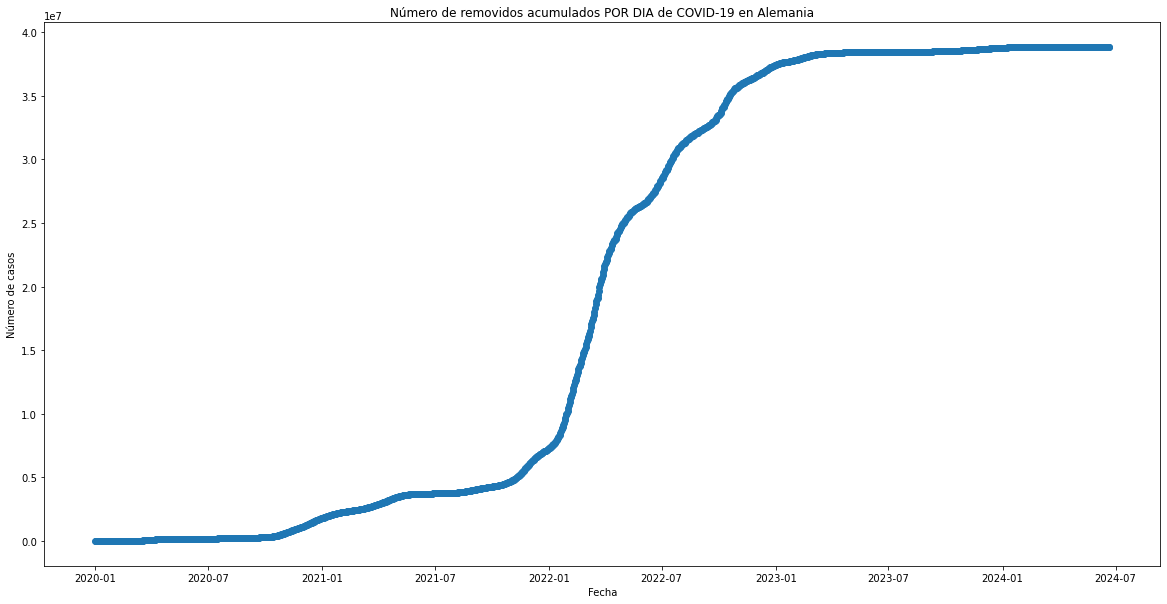

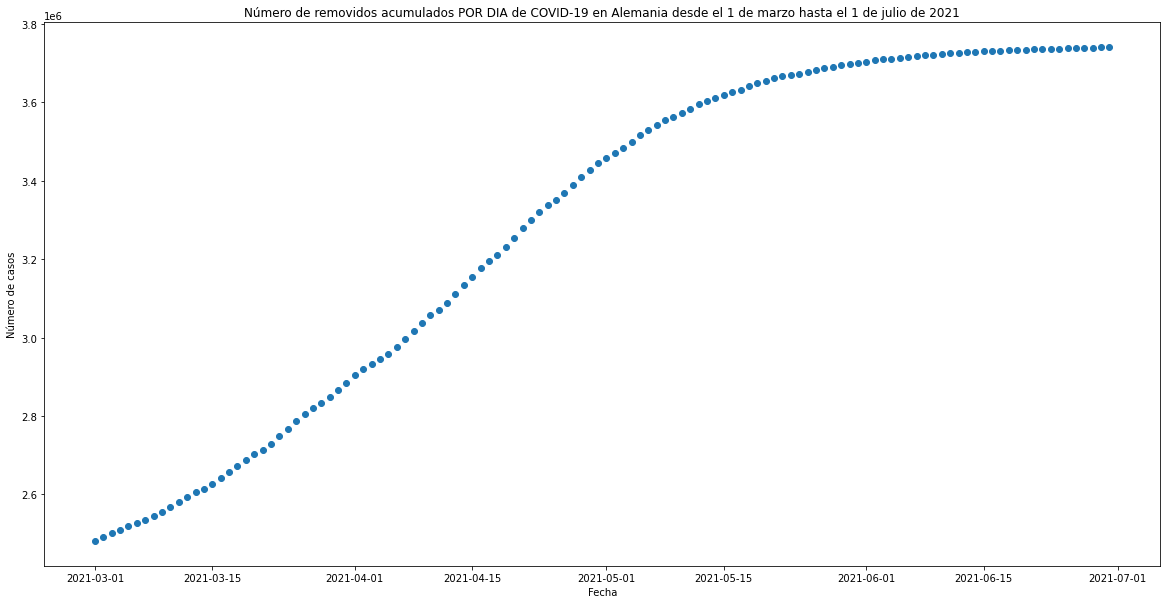

In [10]:

plt.figure(figsize=(20, 10))
plt.scatter(unique_days, cumulative_removing_by_date)
plt.title('Número de removidos acumulados POR DIA de COVID-19 en Alemania')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

plt.figure(figsize=(20, 10))
plt.scatter(unique_days[425:547], cumulative_removing_by_date[425:547])
plt.title('Número de removidos acumulados POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

## 1.3)Los Infectados:I=Ic-R *

In [23]:
#Numero de recuperaciones por dia
recovering_by_date = data.groupby('Fecha de referencia')['Número de recuperaciones'].sum().tolist()
print(recovering_by_date)

#Numero de muertos por dia
deaths_by_date = data.groupby('Fecha de referencia')['Número de muertes'].sum().tolist()
print(deaths_by_date)

#Numero de removidos por dia
removing_by_date = np.array(deaths_by_date) + np.array(recovering_by_date)
print('hi',removing_by_date[:10])



#Numero de removidos acumulados por dia
cumulative_removing_by_date = [sum(removing_by_date[:i]) for i in range(1, len(removing_by_date)+1)]
print(cumulative_removing_by_date)


print(cumulative_sum)


[20, 18, 20, 24, 22, 12, 11, 7, 8, 4, 8, 10, 8, 7, 8, 8, 6, 4, 9, 16, 5, 13, 6, 9, 7, 6, 14, 10, 13, 13, 17, 11, 15, 5, 5, 6, 2, 5, 3, 7, 16, 14, 8, 4, 8, 18, 15, 13, 16, 13, 30, 19, 29, 43, 70, 108, 154, 159, 218, 189, 232, 289, 301, 407, 447, 660, 798, 1092, 1754, 2235, 2792, 3101, 3846, 3848, 3960, 5358, 4817, 5005, 4468, 5010, 4094, 3291, 4702, 3834, 4309, 4035, 4181, 3687, 2850, 4047, 3696, 4145, 3907, 4026, 3029, 2443, 3209, 3184, 3184, 3034, 2368, 2156, 1750, 1657, 1904, 2073, 2018, 2058, 1559, 1201, 1502, 1412, 1615, 1469, 1386, 1067, 758, 1105, 1014, 1031, 1077, 831, 669, 569, 788, 858, 889, 810, 771, 600, 422, 660, 622, 682, 615, 709, 486, 381, 611, 519, 677, 401, 424, 344, 287, 446, 548, 519, 427, 377, 345, 209, 233, 337, 459, 436, 371, 271, 181, 377, 404, 484, 303, 356, 338, 254, 406, 843, 684, 638, 804, 493, 314, 490, 496, 482, 482, 488, 327, 269, 453, 446, 432, 398, 410, 291, 242, 377, 384, 390, 371, 453, 349, 240, 475, 469, 577, 490, 525, 503, 384, 606, 601, 681, 620, 73

In [24]:
#nuero de muertos total
total_deaths = sum(deaths_by_date)
print('El numero de muertos totales',total_deaths)

#numero de recuperados total
total_recovered = sum(recovering_by_date)
print('El numero de recuperados totales',total_recovered)

#numero de infectados total
total_infected = sum(cases_by_date)
print('El numero de infectados totales',total_infected)

print('El numero de removidos es',total_recovered+total_deaths)

#lo anterior cuadra con lo real 

El numero de muertos totales 183322
El numero de recuperados totales 38652040
El numero de infectados totales 38840361
El numero de removidos es 38835362


En una fecha dada, el Ic deberia ser difrente al numero de removidosn acumulados hasta esa fecha

[  20   18   21 ... 4410 4802 4999]


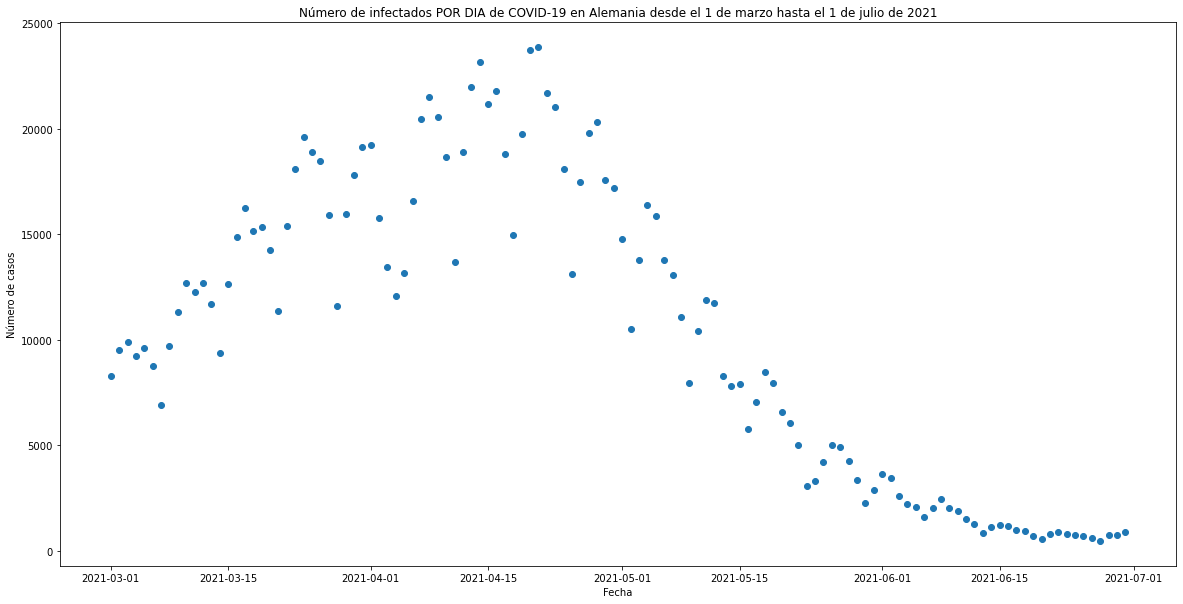

agragando un 0 [0, 0, 20, 38, 59, 84, 107, 119, 130, 137, 145, 150, 158, 168, 176, 183, 191, 199, 206, 210, 219, 235, 240, 253, 259, 269, 276, 282, 296, 306, 319, 333, 350, 361, 376, 382, 387, 394, 396, 401, 404, 411, 427, 441, 449, 453, 462, 480, 495, 508, 525, 539, 572, 591, 620, 664, 734, 844, 1006, 1167, 1389, 1580, 1816, 2115, 2427, 2844, 3300, 3979, 4799, 5913, 7693, 9963, 12803, 15964, 19889, 23799, 27856, 33351, 38296, 43446, 48042, 53249, 57487, 60907, 65866, 69913, 74480, 78744, 83183, 87135, 90162, 94523, 98487, 102943, 107178, 111547, 114811, 117456, 120963, 124409, 127868, 131155, 133723, 136047, 137954, 139739, 141798, 144034, 146181, 148368, 150027, 151330, 152955, 154468, 156177, 157746, 159200, 160328, 161122, 162293, 163372, 164464, 165600, 166469, 167162, 167755, 168585, 169481, 170396, 171242, 172047, 172654, 173101, 173783, 174422, 175130, 175761, 176500, 177009, 177403, 178026, 178557, 179264, 179671, 180107, 180461, 180754, 181209, 181771, 182303, 182739, 183120,

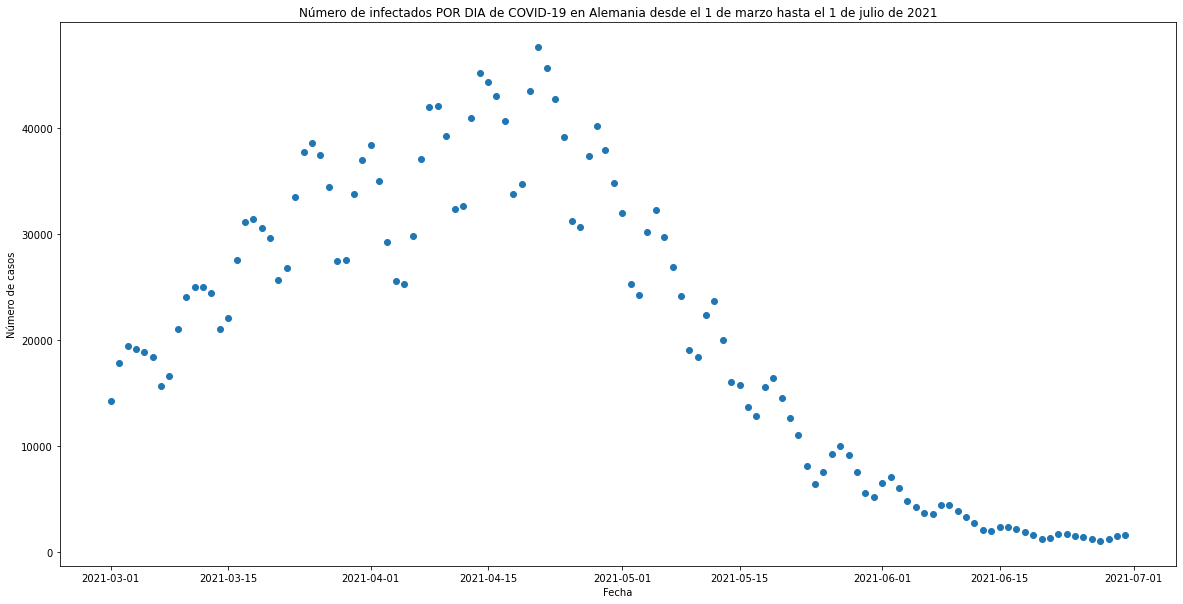

In [26]:
infected = np.array(cumulative_sum) - np.array(cumulative_removing_by_date)
print(infected)
plt.figure(figsize=(20, 10))
plt.scatter(unique_days[425:547], infected[425:547])
plt.title('Número de infectados POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.show()


#metiendo un 0 en el primer lugar de cumulative_removing_by_date y removiendo el ultimo valor 
cumulative_removing_by_date.pop()
cumulative_removing_by_date.insert(0,0)
print('agragando un 0',cumulative_removing_by_date)

infected = np.array(cumulative_sum) - np.array(cumulative_removing_by_date)
print(infected)
plt.figure(figsize=(20, 10))
plt.scatter(unique_days[425:547], infected[425:547])
plt.title('Número de infectados POR DIA de COVID-19 en Alemania desde el 1 de marzo hasta el 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.show()

## 1.3)Los suceptibles S: Acumulados, estan bien 
S=N-I-R 

 =N-Ic+R-R=N-Ic

Text(0, 0.5, 'Número de casos')

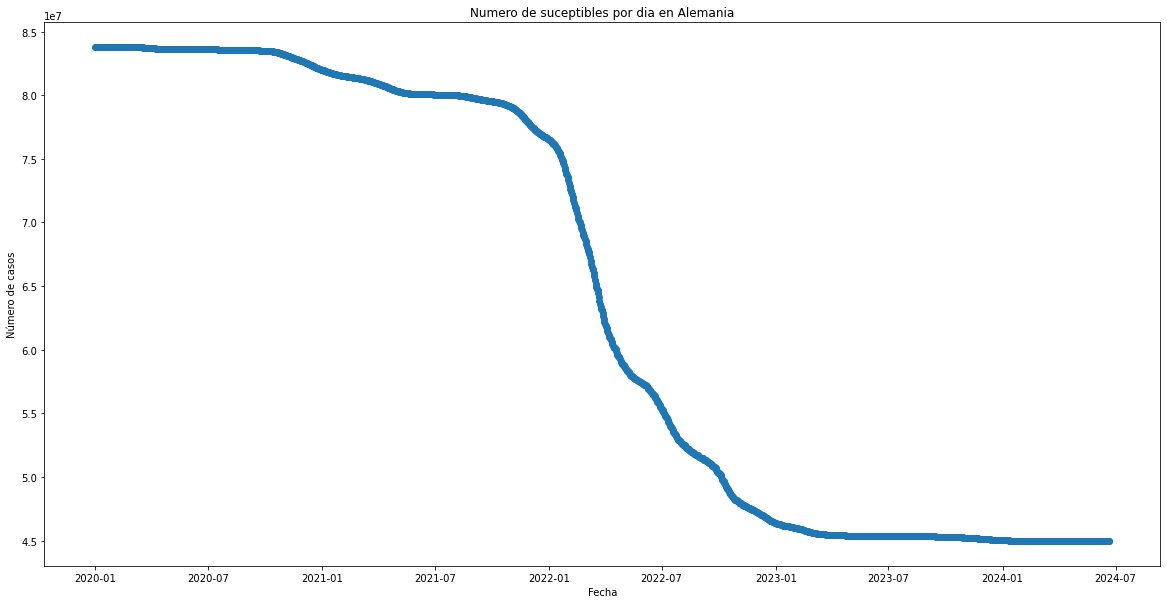

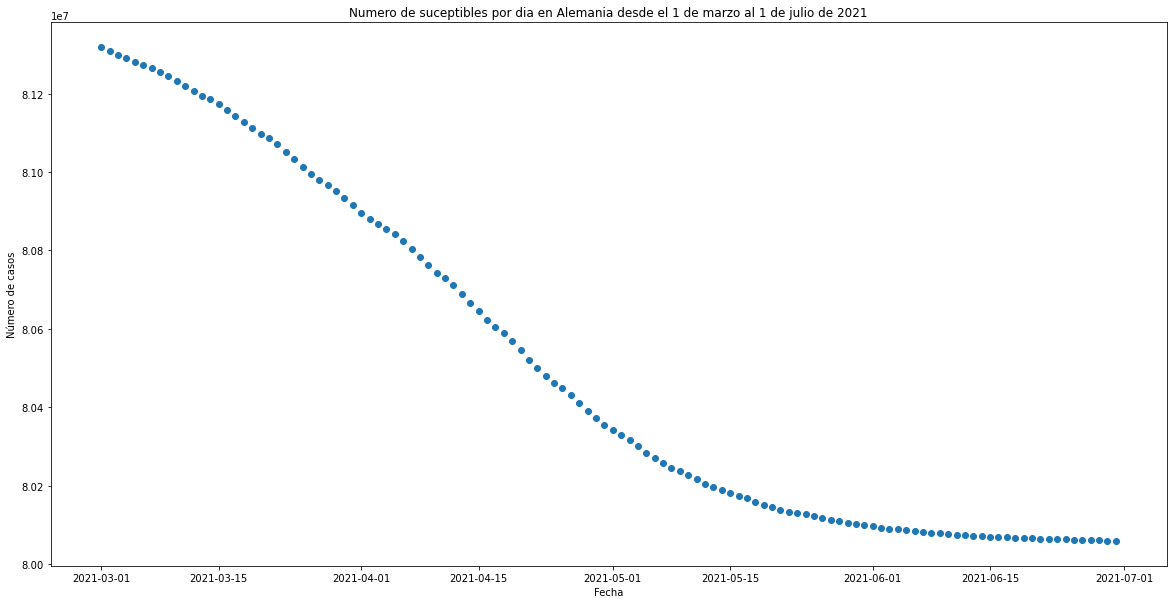

In [27]:

plt.figure(figsize=(20, 10))
plt.scatter(unique_days, susceptible_by_date, label='Susceptibles')
plt.title('Numero de suceptibles por dia en Alemania')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

plt.figure(figsize=(20, 10))
plt.scatter(unique_days[425:547], susceptible_by_date[425:547], label='Susceptibles')
plt.title('Numero de suceptibles por dia en Alemania desde el 1 de marzo al 1 de julio de 2021')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

### **Las graficas pero por semana: Sabemos que estos estan correctos al comparar con** https://data.who.int/dashboards/covid19/cases?m49=276&n=c


234


Text(0, 0.5, 'Número de casos')

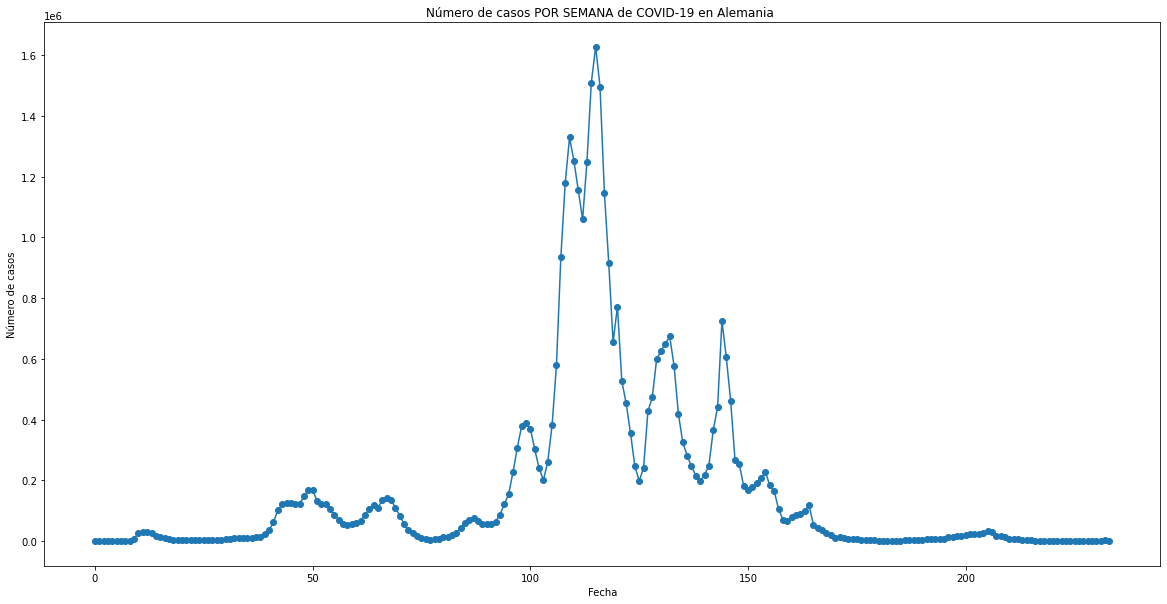

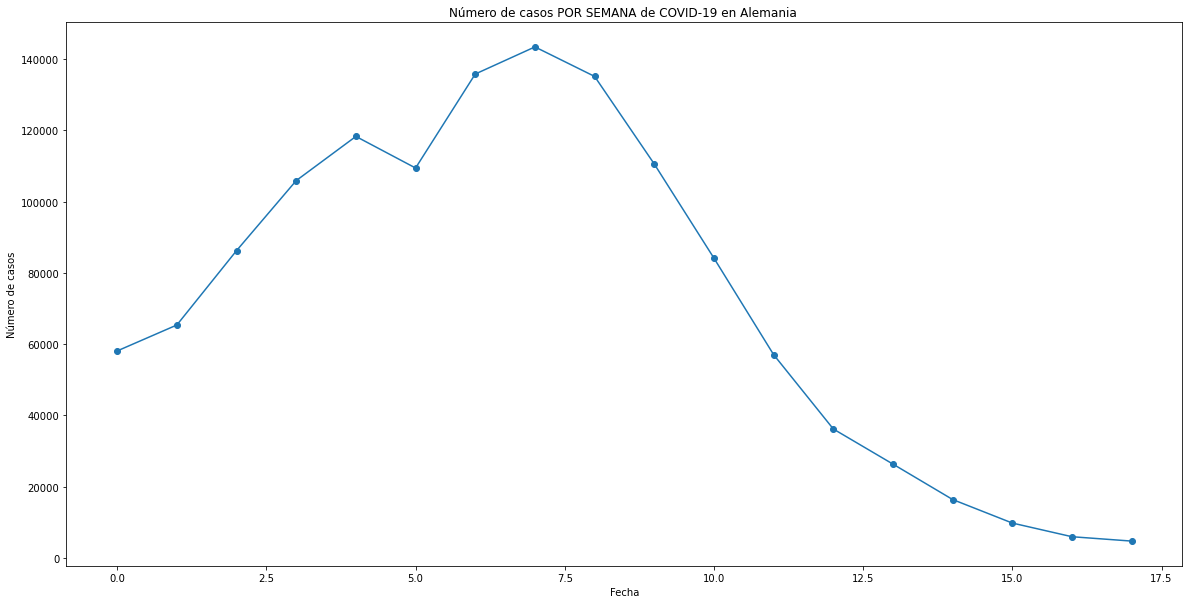

In [28]:
sum_each_7_days = [sum(cases_by_date[i:i+7]) for i in range(0, len(cases_by_date), 7)]
print(len(sum_each_7_days))

plt.figure(figsize=(20, 10))
plt.plot(sum_each_7_days, marker='o')
plt.title('Número de casos POR SEMANA de COVID-19 en Alemania ')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')

plt.figure(figsize=(20, 10))
plt.plot(sum_each_7_days[60:78], marker='o')# los indices los saque de manera rapida teniendo en cuenta las semanas de los 1524 dias
plt.title('Número de casos POR SEMANA de COVID-19 en Alemania ')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')